# 6106415

In [1]:
import apollinaire as apn
%matplotlib inline
from astropy.io import fits
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
apn.__version__

'1.0'

In [3]:
dr25 = pd.read_csv ('../tables/dr25.csv')
dr25 = dr25.set_index ('KIC')

In [4]:
kic = 6106415

r=dr25.loc[kic, 'Rad']
m=dr25.loc[kic, 'Mass']
teff=dr25.loc[kic, 'Teff']

print (kic, '>>> Teff = {:.0f} K'.format (teff), '---- M = {:.3f} Msun'.format (m), '---- R = {:.3f} Rsun'.format (r))

modDir = path.abspath ('..')
filename = glob.glob (path.join (modDir, 'data/kplr' + str(kic).zfill (9) + '*_COR_filt_inp.fits'))[0]
hdu = fits.open (filename) [0]
data = np.array (hdu.data)
t = data[:,0]
v = data[:,1]

6106415 >>> Teff = 6028 K ---- M = 1.039 Msun ---- R = 1.202 Rsun


Text(0, 0.5, 'Luminosity variation (ppm)')

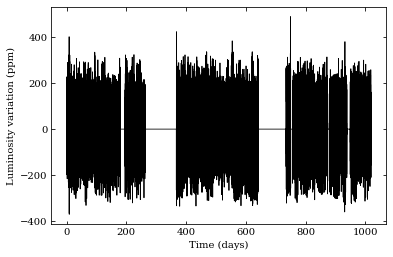

In [5]:
fig, ax = plt.subplots ()
ax.plot (t-t[0], v, color='black')

ax.set_xlabel ('Time (days)')
ax.set_ylabel ('Luminosity variation (ppm)')

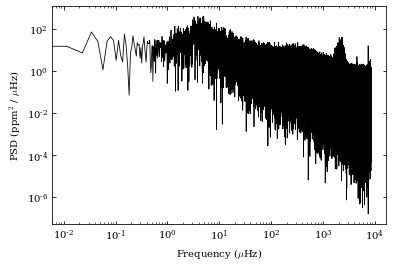

In [6]:
dt = np.median (t[1:] - t[:-1]) * 86400
freq, psd = apn.psd.series_to_psd (v, dt=dt, correct_dc=True)
freq = freq*1e6
psd = psd*1e-6

fig, ax = plt.subplots ()
ax.plot (freq, psd, color='black')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')
ax.set_yscale ('log')
ax.set_xscale ('log')

Text(0, 0.5, 'PSD (ppm$^2$ / $\\mu$Hz)')

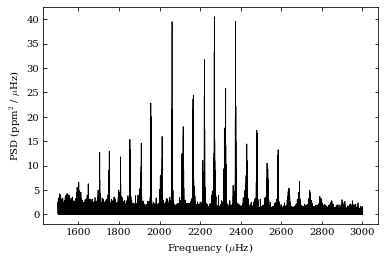

In [7]:
fig, ax = plt.subplots ()
cond = (freq>1500.)&(freq<3000.)
ax.plot (freq[cond], psd[cond], color='black')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')

In [8]:
back = np.loadtxt ('background.dat')
pattern = np.loadtxt ('pattern.dat', usecols=0)
Dnu, numax, Hmax, Wenv = pattern[2], pattern[3], pattern[4], pattern[5] 
psd = psd[freq<4000]
freq = freq[freq<4000]

In [9]:
apn.peakbagging.stellar_framework (freq, psd, r, m, teff, n_harvey=2, back=back,
                                   numax=numax, Hmax=Hmax, Wenv=Wenv, d13=10, 
                                   low_cut=50., filename_back='background',
                                   filemcmc_back='mcmc_background.h5', nsteps_mcmc_back=500, n_order=3, n_order_peakbagging=7, 
                                   filename_pattern='pattern', fit_l3=True, nwalkers=500, pattern_mle=False, 
                                   filemcmc_pattern='mcmc_pattern.h5', nsteps_mcmc_pattern=500, parallelise=True, 
                                   quickfit=True, num=500, discard_pkb=200, discard_pattern=250,
                                   progress=True, a2z_file='modes_param_test.a2z', nopeakbagging=True,
                                   nsteps_mcmc_peakbagging=1000, filename_peakbagging='summary_peakbagging.pdf',
                                   fit_splittings=True, fit_angle=True, fit_amp=True)

Beginning fit


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:46<00:00,  4.69it/s]
